In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Attach the data
ev_data = pd.read_csv('/kaggle/input/electricvehicle/Electric_Vehicle_Population_Data (1).csv')

# First few rows of the Data
print(ev_data.head())

# Summary
print(ev_data.describe())

# Missing values
print(ev_data.isnull().sum())

   VIN (1-10)    County     City State  Postal Code  Model Year   Make  \
0  WAUTPBFF4H      King  Seattle    WA      98126.0        2017   AUDI   
1  WAUUPBFF2J  Thurston  Olympia    WA      98502.0        2018   AUDI   
2  5YJSA1E22H  Thurston    Lacey    WA      98516.0        2017  TESLA   
3  1C4JJXP62M  Thurston   Tenino    WA      98589.0        2021   JEEP   
4  5YJ3E1EC9L    Yakima   Yakima    WA      98902.0        2020  TESLA   

      Model                   Electric Vehicle Type  \
0        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
1        A3  Plug-in Hybrid Electric Vehicle (PHEV)   
2   MODEL S          Battery Electric Vehicle (BEV)   
3  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
4   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range              16   
1             Not eligible due to low battery range              16   
2          

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

Dataset source : https://catalog.data.gov/dataset/electric-vehicle-population-data

Electric Vehicle Type
Battery Electric Vehicle (BEV)            141973
Plug-in Hybrid Electric Vehicle (PHEV)     39485
Name: count, dtype: int64


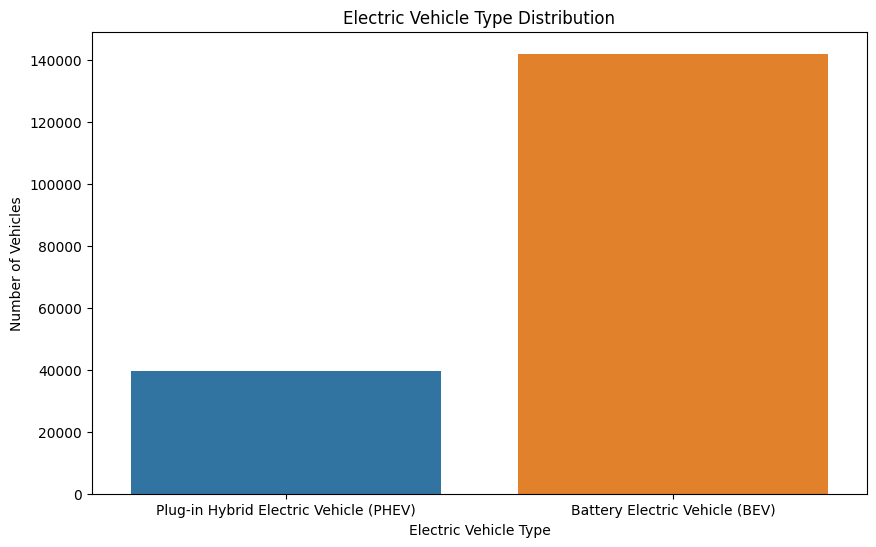

In [3]:
# Number of Electric Vehicle Type
ev_type_counts = ev_data['Electric Vehicle Type'].value_counts()
print(ev_type_counts)

# Electric Vehicle Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=ev_data)
plt.title('Electric Vehicle Type Distribution')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.savefig('electric_vehicle_type_distribution.png')  # Save the plot as PNG fi
plt.show()

Electric Vehicle Type Distribution

The number of Battery Electric Vehicles of 141,973 is significantly higher than the number of Plug-in Hybrid Electric Vehicles which is 39,485. This suggests a stronger adoption or preference for fully electric vehicles over hybrid electric vehicles.
The higher number of BEVs might also indicate growing consumer confidence in electric vehicle technology, infrastructure improvements (such as more charging stations), and potential policy or incentive impacts favoring BEVs in Washington State.

Make
TESLA                   80819
NISSAN                  14037
CHEVROLET               13864
FORD                     9527
BMW                      7680
KIA                      7642
TOYOTA                   6519
VOLKSWAGEN               5163
JEEP                     4690
HYUNDAI                  4561
RIVIAN                   4425
VOLVO                    4288
AUDI                     3738
CHRYSLER                 3059
MERCEDES-BENZ            1647
PORSCHE                  1158
MITSUBISHI                980
MINI                      925
POLESTAR                  895
SUBARU                    838
HONDA                     836
FIAT                      783
DODGE                     608
MAZDA                     506
CADILLAC                  434
LEXUS                     398
LINCOLN                   270
SMART                     269
LUCID                     238
JAGUAR                    236
GENESIS                   190
FISKER                    112
LAND ROVER                 58
ALFA 

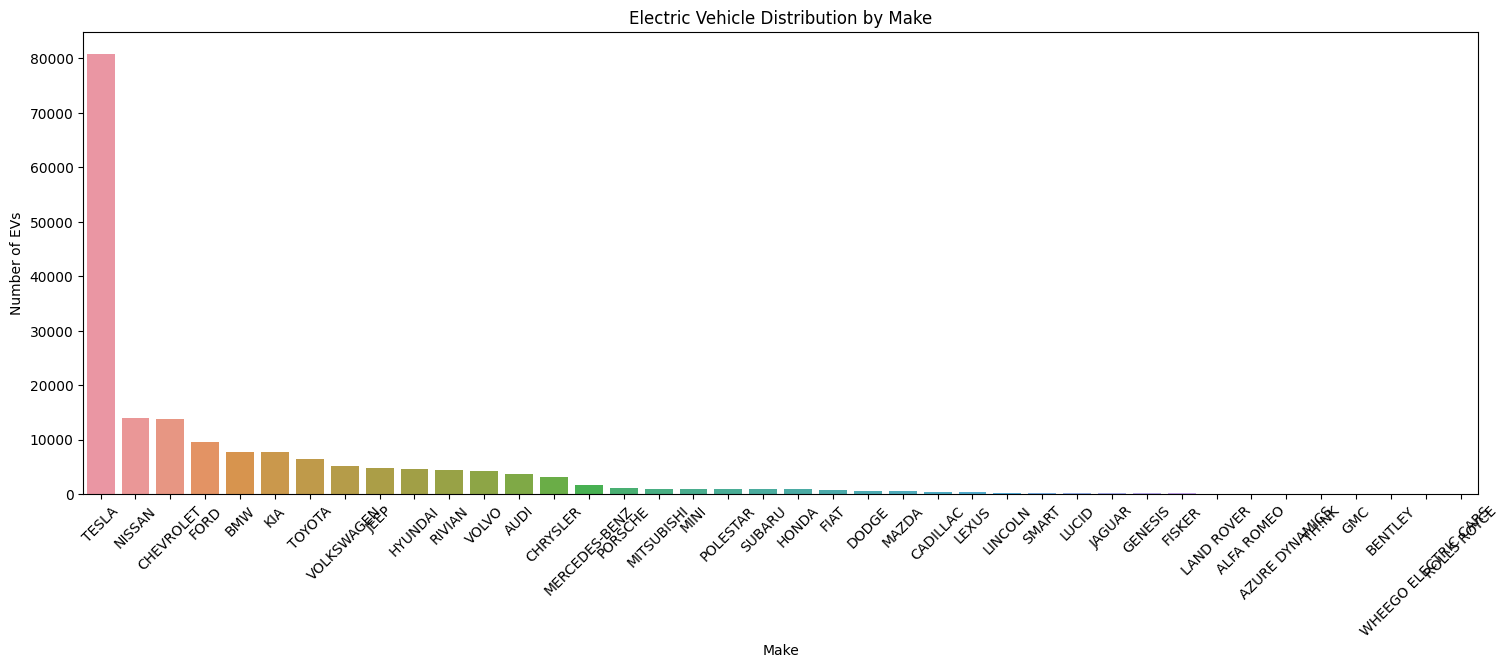

In [4]:
# Electric Vehicle Make
ev_type_counts = ev_data['Make'].value_counts()
print(ev_type_counts)

# Electric Vehicle Distribution by Make
plt.figure(figsize=(18, 6))
sns.countplot(x='Make', data=ev_data, order=ev_data['Make'].value_counts().index)
plt.title('Electric Vehicle Distribution by Make')
plt.xlabel('Make')
plt.ylabel('Number of EVs')
plt.savefig('electric_vehicle_type_make.png')  # Save the plot as PNG fi
plt.xticks(rotation=45)
plt.show()

Electric Vehicle Distribution by Make

The overwhelming number of Tesla registrations (80,819) indicates Tesla's strong market leadership and brand dominance in the electric vehicle sector.
The presence of numerous manufacturers with varying counts of electric vehicles shows a diverse and competitive market, with both established automakers and new entrants contributing to the growth of electric vehicles.
The inclusion of high-end brands like Mercedes-Benz, Porsche, and Lucid highlights the growing trend of luxury electric vehicles.

                    Make  Electric Range
0             ALFA ROMEO       33.000000
1                   AUDI       49.442215
2         AZURE DYNAMICS       56.000000
3                BENTLEY       19.666667
4                    BMW       34.204818
5               CADILLAC        7.488479
6              CHEVROLET       94.745961
7               CHRYSLER       32.208892
8                  DODGE       32.000000
9                   FIAT       85.632184
10                FISKER        3.241071
11                  FORD       10.405899
12               GENESIS        0.000000
13                   GMC        0.000000
14                 HONDA       46.208134
15               HYUNDAI       19.054813
16                JAGUAR      204.254237
17                  JEEP       22.353305
18                   KIA       43.729129
19            LAND ROVER       25.482759
20                 LEXUS       18.665829
21               LINCOLN       23.462963
22                 LUCID        0.000000
23              

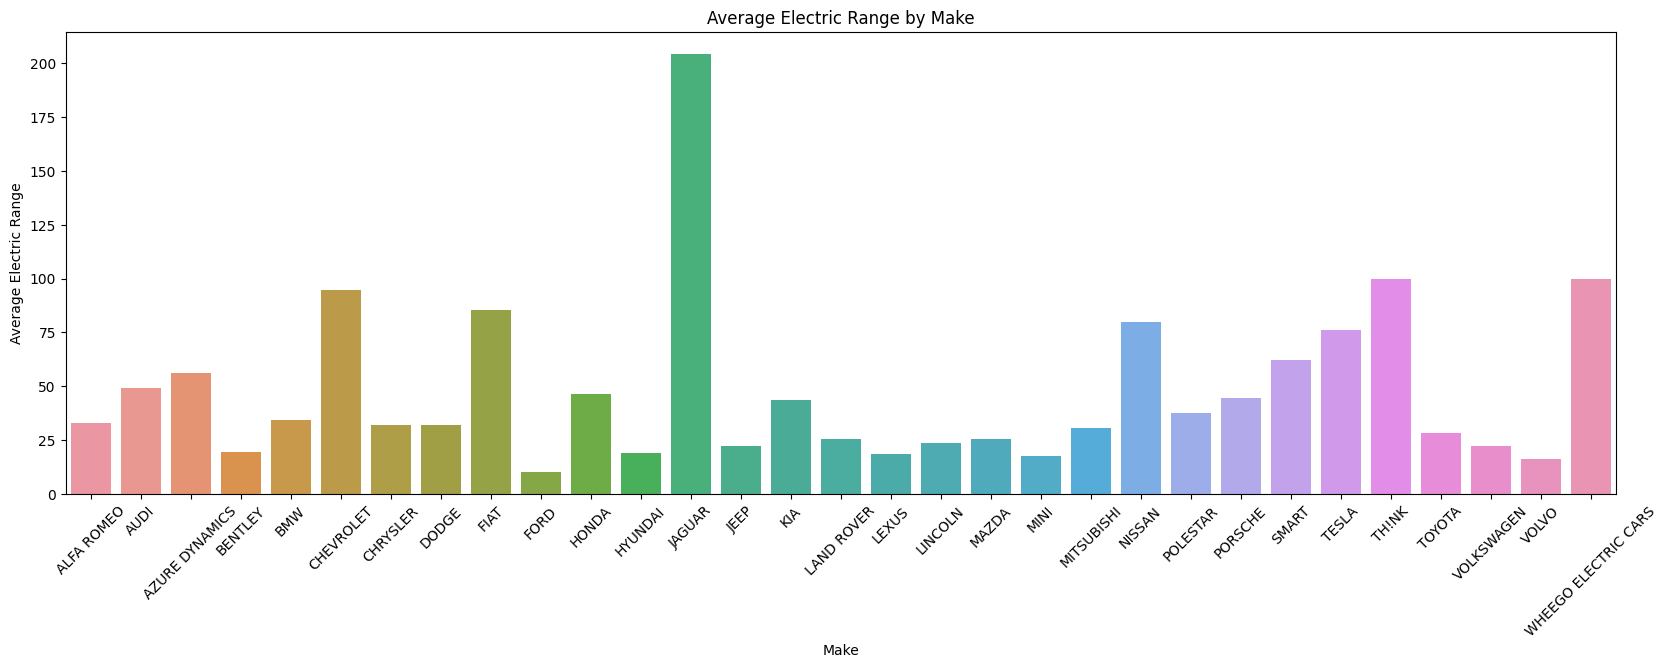

In [5]:
 #Average electric range by make
avg_range_by_make = ev_data.groupby('Make')['Electric Range'].mean().reset_index()
print(avg_range_by_make)

# Average electric range >= 10
filtered_avg_range_by_make = avg_range_by_make[avg_range_by_make['Electric Range'] >= 10]

# Ploting the average electric range by make >= 10
plt.figure(figsize=(20, 6))
sns.barplot(x='Make', y='Electric Range', data=filtered_avg_range_by_make)
plt.title('Average Electric Range by Make')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45)
plt.savefig('electric_vehicle_range.png')  # Save the plot as PNG file
plt.show()

Average Electric Range by Make

There is significant variability in the average electric range across different makes, indicating a diverse market with different strategies and technologies.
Brands like Jaguar and Chevrolet stand out for their higher average ranges, indicating a focus on long-range capabilities.
Makes like TH!NK and Wheego Electric Cars show high ranges despite their niche status, which is notable.

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      770
2012     1603
2013     4375
2014     3502
2015     4821
2016     5524
2017     8591
2018    14291
2019    10922
2020    11851
2021    19034
2022    27922
2023    58393
2024     9799
Name: count, dtype: int64


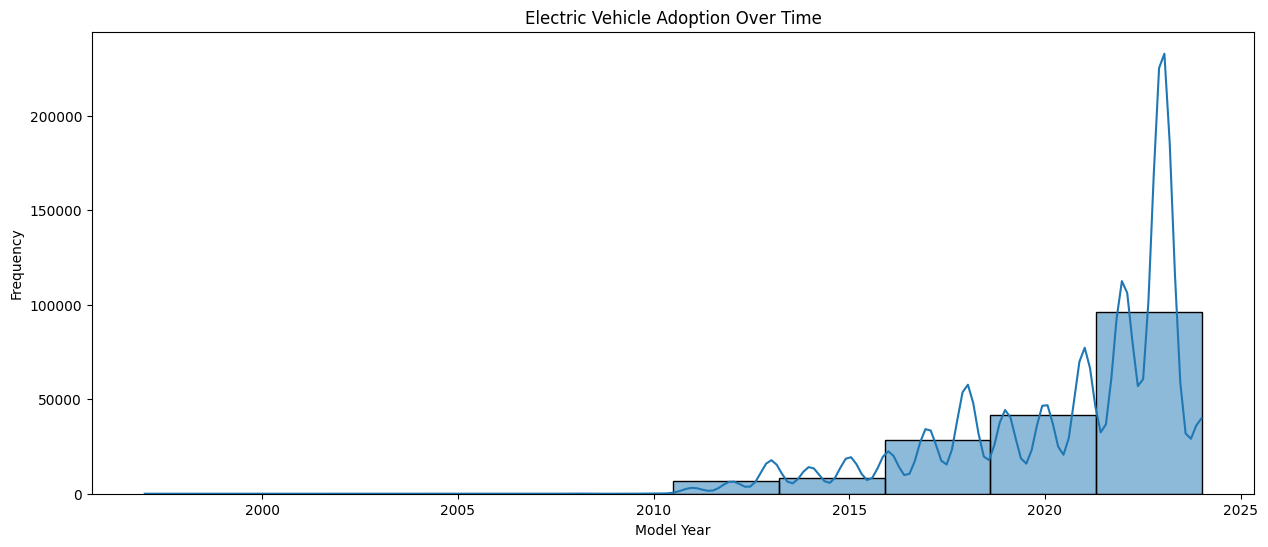

In [6]:
# Electric Vehicle Adoption Over Time
import warnings

# Suppress specific FutureWarning related to pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# Count the number of vehicles by model year
vehicles_by_year = ev_data['Model Year'].value_counts().sort_index()
print(vehicles_by_year)

plt.figure(figsize=(15, 6))
sns.histplot(ev_data['Model Year'], bins=10, kde=True)
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.savefig('electric_vehicle_adoption.png')  # Save the plot as PNG fi
plt.show()

Electric Vehicle Adoption Over Time'

The adoption of electric vehicles has grown exponentially, especially from 2011 onwards, indicating a clear trend towards EVs becoming a dominant mode of transportation.
The sharp rise in registrations from 2017 onwards suggests significant improvements in EV technology, making them more viable for a larger segment of consumers.
Policy measures, incentives, and subsidies likely played a crucial role in accelerating adoption, especially in the recent years (2021-2023).
The variety and availability of electric vehicle models have increased, catering to diverse consumer needs, from affordable options to luxury EVs.

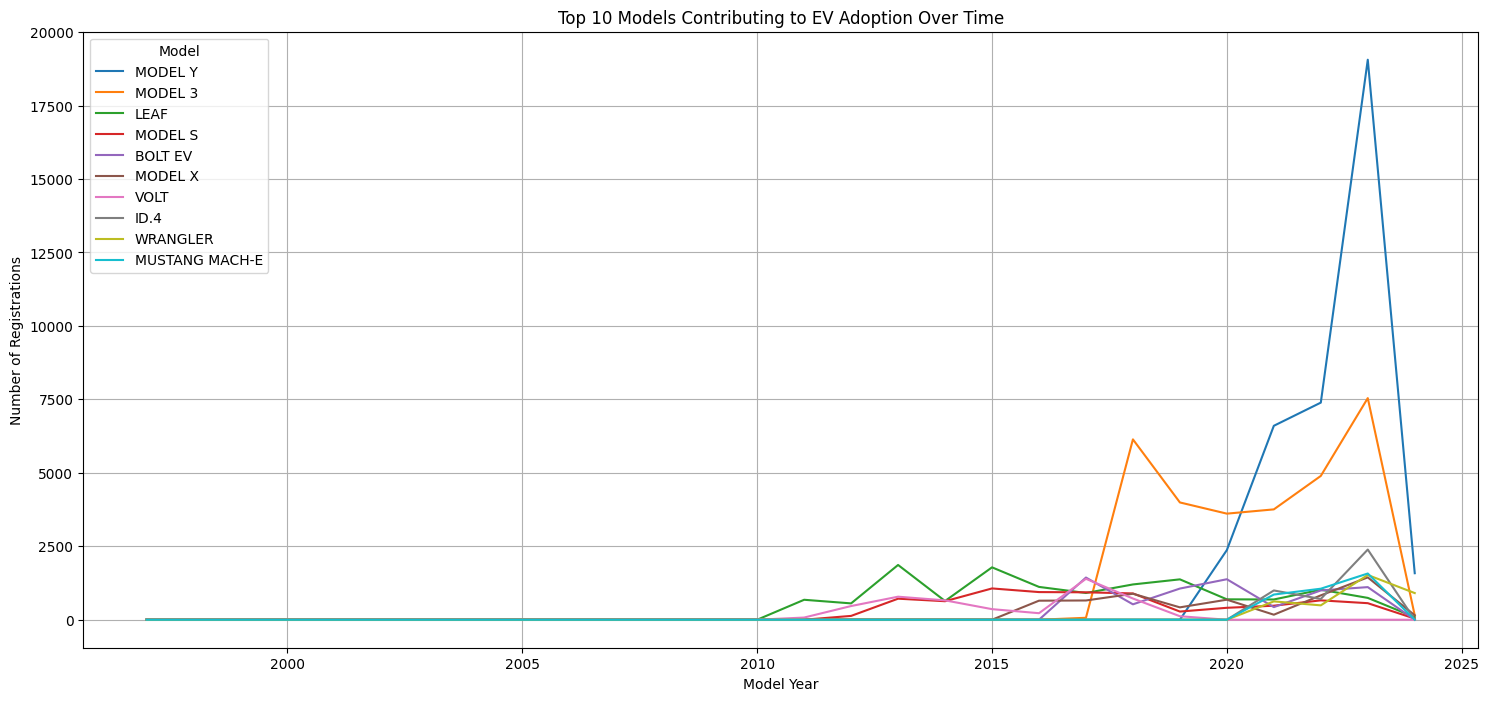

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of vehicles by model year and model
model_counts = ev_data.groupby(['Model Year', 'Model']).size().unstack().fillna(0)

# Plot the top models contributing to spikes over the years
top_models = model_counts.sum().nlargest(10).index  # Select top 10 models

model_counts[top_models].plot(kind='line', figsize=(18, 8))
plt.title('Top 10 Models Contributing to EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.legend(title='Model')
plt.grid(True)
plt.show()


Impact of Specific Models

Tesla models (Model Y, Model 3, Model S, and Model X) dominate the top spots, indicating Tesla’s strong market position and consumer preference for their vehicles.
Manufacturers like Nissan, Chevrolet, Volkswagen, Jeep, and Ford, showing a broad acceptance and competition in the electric vehicle market.
Models like the Tesla Model Y, Model 3, and Nissan Leaf suggest a consumer preference for compact and mid-sized electric vehicles.

County
King            94460
Snohomish       21439
Pierce          14043
Clark           10675
Thurston         6600
Kitsap           5956
Spokane          4671
Whatcom          4331
Benton           2183
Skagit           1968
Island           1921
Clallam          1079
Chelan           1078
Yakima           1034
Jefferson         996
San Juan          947
Cowlitz           935
Mason             840
Lewis             767
Grays Harbor      648
Name: count, dtype: int64


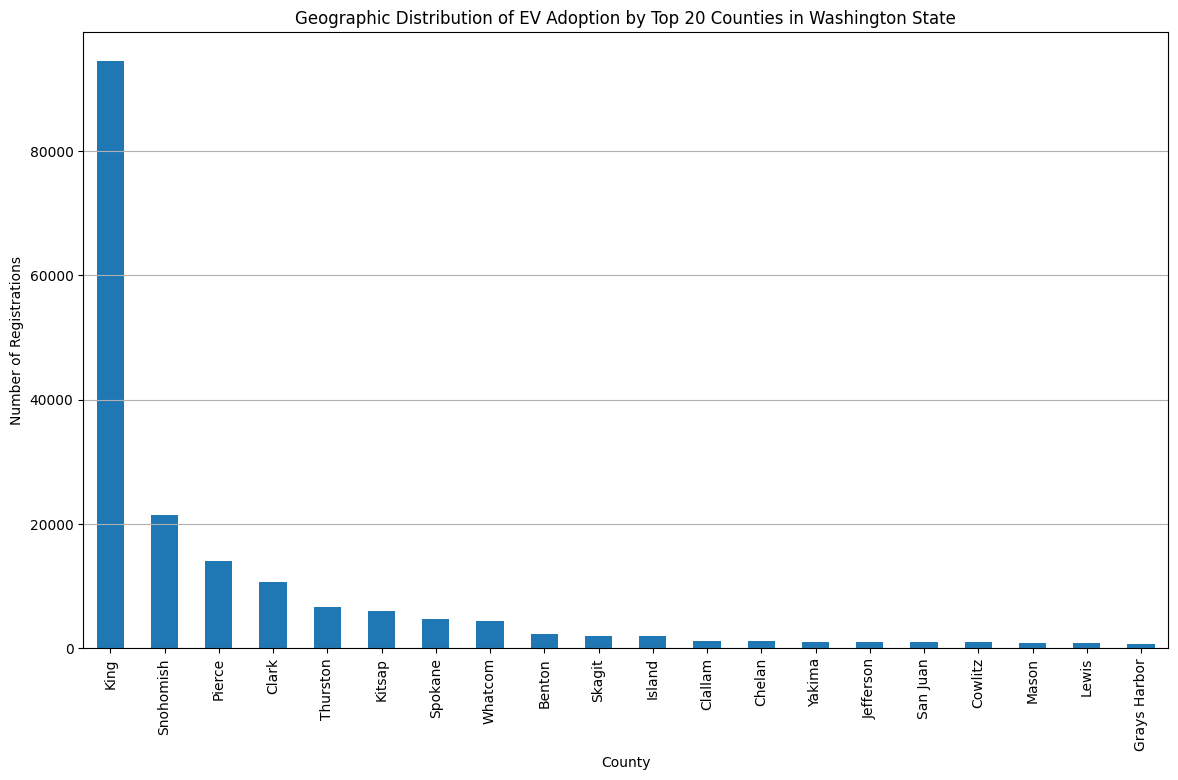

In [9]:
# Count the number of vehicles by county
county_counts = ev_data['County'].value_counts().nlargest(20)  # Get the top 20 counties
print(county_counts)

# Plot the geographic distribution by county
plt.figure(figsize=(14, 8))
county_counts.plot(kind='bar')
plt.title('Geographic Distribution of EV Adoption by Top 20 Counties in Washington State')
plt.xlabel('County')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Geographic Distribution of EV Adoption by Top 20 Counties in Washington State

Urban counties like King, Snohomish, and Pierce show significantly higher adoption rates compared to rural counties, likely due to better infrastructure, higher income levels, and greater environmental awareness.
Proximity to environmentally conscious urban centers (like Portland, OR) seems to positively influence neighboring counties’ adoption rates.
Counties with lower numbers still show potential for growth as awareness and infrastructure for EVs improve statewide.